# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)



data augmentation is a technique to create more example artificially using existing dataset

this is used if your dataset is very small  and data imbalance means some your classes in the dataset has few examples and you want to increase the number of those examples

data augmentaion often slve overfitting

above example is horizontal flipping examples

# Task 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Task 2: Rotation

In [2]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40 #from -40 to 40 degrees randomly to the images
    
    
)

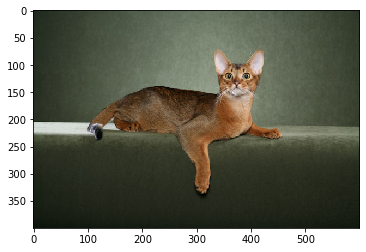

In [3]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


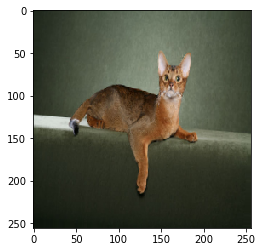

In [4]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

we can shift the pixel accross the horizontal and vertical aixs


In [5]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    width_shift_range=[-100 , -50,0,50,100],
    height_shift_range=[-50,50]
    
)

Found 1 images belonging to 1 classes.


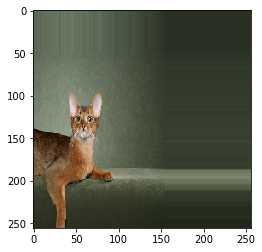

In [8]:
x, y = next(generator.flow_from_directory('images', batch_size=1))#iterator
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


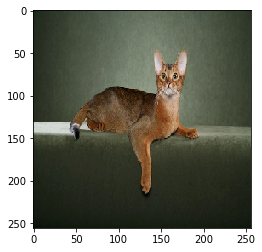

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0.5,2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


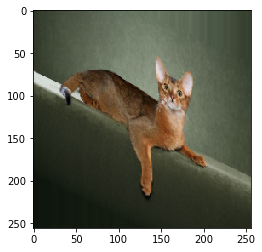

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


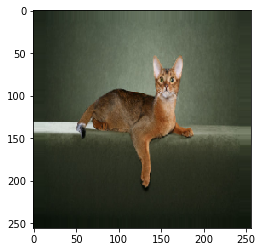

In [12]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


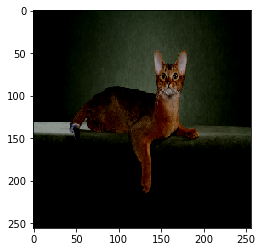

In [14]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100 #-100 to 100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 8: Flips

Found 1 images belonging to 1 classes.


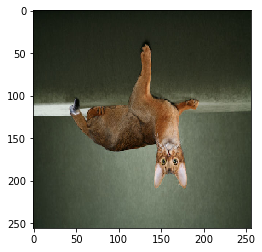

In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [20]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#x_mean=x_train.mean()
#x_std=x_train.std()
#x_train_norm=(x_train-x_mean)/x_std

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

In [21]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.2967035 0.6090061 [[6]]
120.70756512369792


### Samplewise

In [22]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-3.973643e-08 1.0 [[4]]


# Task 10: Rescale and Preprocessing Function

In [23]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [24]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [25]:
print(x.mean(), x.std(), y)

-0.00039966594 0.0011238926 [[6]]


# Task 11: Using in Model Training

In [27]:
generator=tf.keras.preprocessing.image.ImageDataGenerator(
    
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip=True,
    rotation_range=20
)

In [30]:
model= tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False,input_shape=(32,32,3),
                                                  pooling="avg"),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [31]:
model.fit(generator.flow(x_train,y_train,batch_size=32),epochs=1,steps_per_epoch=0)

  ...
    to  
  ['...']
Train for 1563 steps
  93/1563 [>.............................] - ETA: 12:41 - loss: 2.4007 - accuracy: 0.2870

KeyboardInterrupt: 